Q1: The new clusters after the first iteration
Cluster 1: [array([2, 5]), array([1, 2])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([ 2, 10]), array([5, 8]), array([4, 9])]

Q2: The centers of the new clusters after the first iteration
Center 1: [1.5 3.5]
Center 2: [7.         4.33333333]
Center 3: [3.66666667 9.        ]


Q3


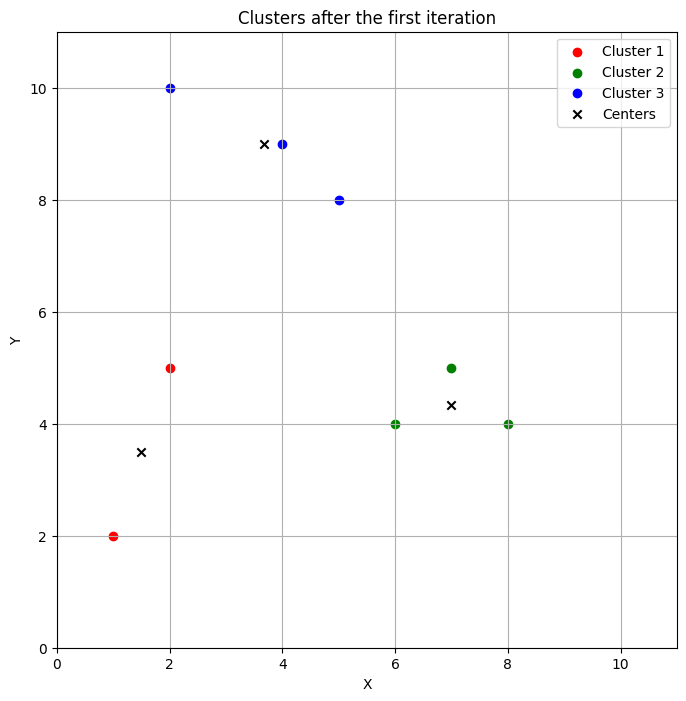



Q4
Epoch 1:

Point 1 - Cluster 3
Point 2 - Cluster 1
Point 3 - Cluster 2
Point 4 - Cluster 3
Point 5 - Cluster 2
Point 6 - Cluster 2
Point 7 - Cluster 1
Point 8 - Cluster 3
Epoch 2:

Point 1 - Cluster 3
Point 2 - Cluster 1
Point 3 - Cluster 2
Point 4 - Cluster 3
Point 5 - Cluster 2
Point 6 - Cluster 2
Point 7 - Cluster 1
Point 8 - Cluster 3


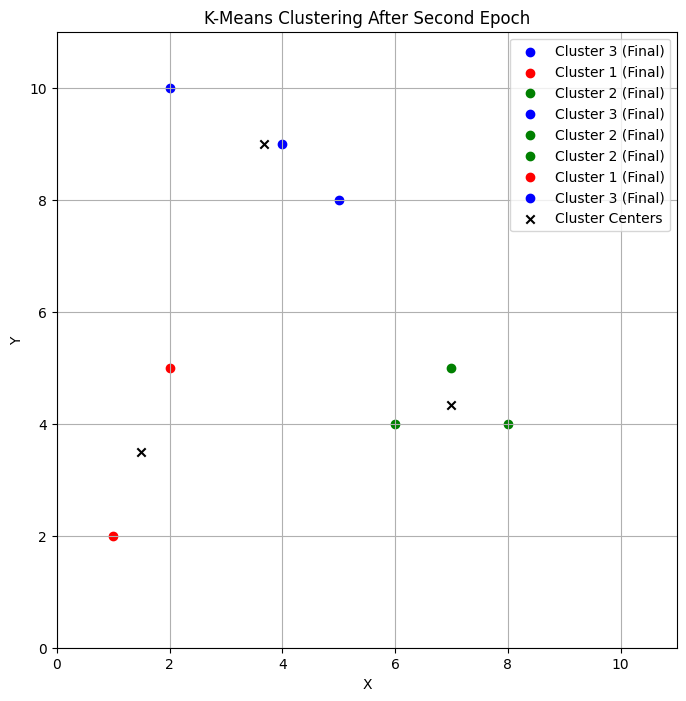


Number of iterations to converge: 2


Q5


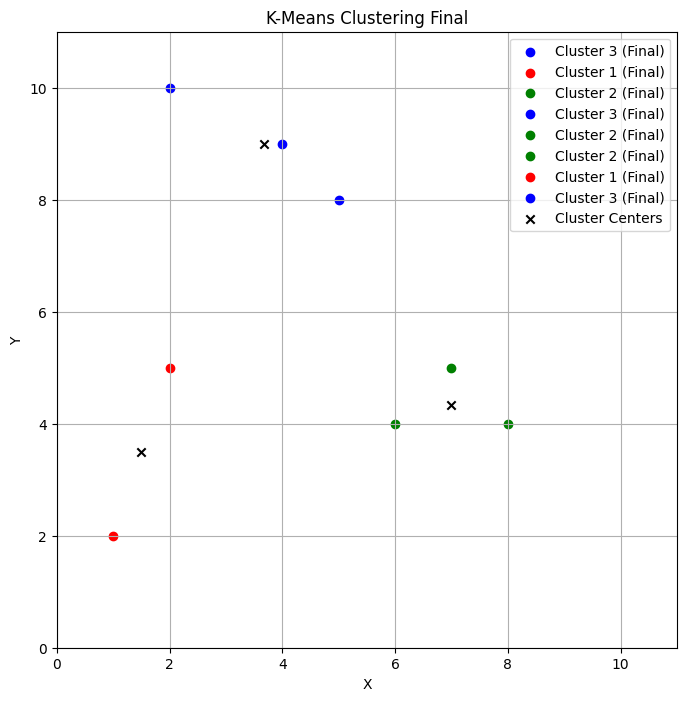

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Q6: Test set pseudo-accuracy: 0.69


Q7


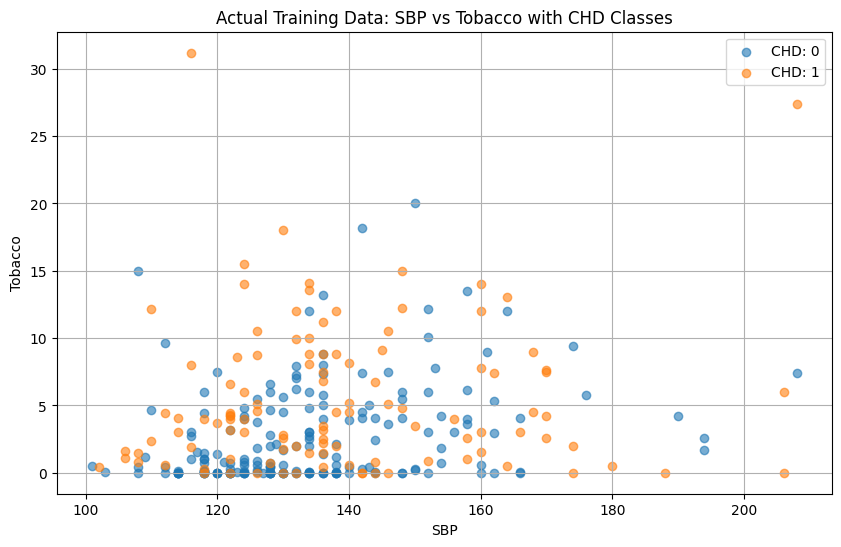



Q8


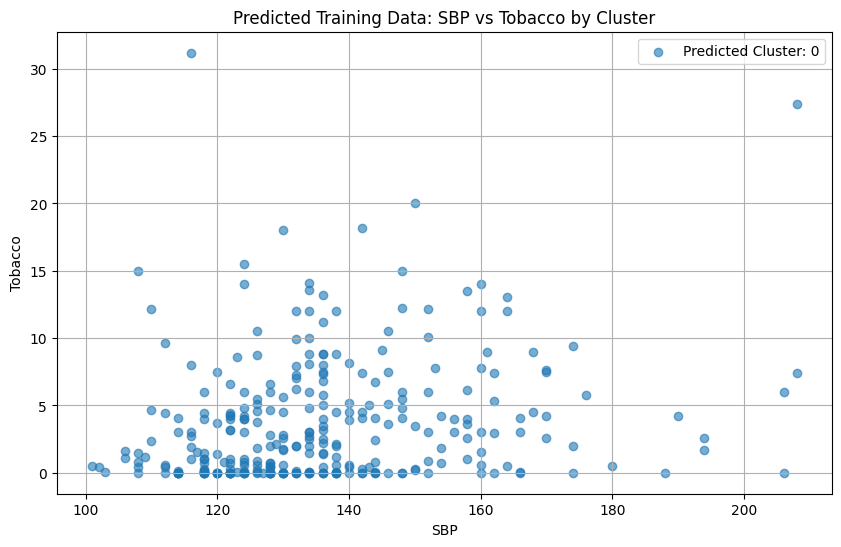

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Function to perform K-means clustering
def k_means(points, initial_centers):
    centers = initial_centers
    iterations = 0
    while True:
        clusters = {i: [] for i in range(len(centers))}
        for point in points:
            distances = np.sqrt(((point - centers) ** 2).sum(axis=1))
            min_dist_index = np.argmin(distances)
            clusters[min_dist_index].append(point)

        new_centers = np.array([np.mean(cluster, axis=0) for cluster in clusters.values()])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers
        iterations += 1
    return clusters, centers, iterations

# Dataset 1: K-means clustering setup
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
initial_centers = np.array([points[1], points[2], points[7]])

### Q1-Q3: Initial K-means Clustering on Dataset 1
clusters, new_centers, _ = k_means(points, initial_centers)

# Q1: The new clusters after the first iteration
print("Q1: The new clusters after the first iteration")
for i, cluster in enumerate(clusters.values()):
    print(f"Cluster {i+1}: {cluster}")

# Q2: The centers of the new clusters after the first iteration
print("\nQ2: The centers of the new clusters after the first iteration")
for i, center in enumerate(new_centers):
    print(f"Center {i+1}: {center}")

# Q3: Plot a 10 by 10 space with all the 8 points
print("\n\nQ3")
plt.figure(figsize=(8, 8))
plt.xlim(0, 11)
plt.ylim(0, 11)
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters.values()):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(new_centers[:, 0], new_centers[:, 1], c='black', marker='x', label='Centers')
plt.title('Clusters after the first iteration')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Q4: How many are more iterations needed to converge? Draw the result for each epoch.
print("\n\nQ4")
# Dataset
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initialize cluster centers with seeds A2, A3, and A8
initial_centers = np.array([points[1], points[2], points[7]])

# Assign each data point to the nearest cluster center
def assign_clusters(points, centers):
    num_points = points.shape[0]
    distances = np.zeros((num_points, len(centers)))

    for i in range(num_points):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(points[i] - center)

    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments

# Update the cluster centers
def update_centers(points, cluster_assignments, k):
    num_features = points.shape[1]
    centers = np.zeros((k, num_features))

    for i in range(k):
        cluster_points = points[cluster_assignments == i]
        centers[i] = np.mean(cluster_points, axis=0)

    return centers

# K-Means algorithm for multiple epochs until convergence
def kmeans(points, initial_centers):
    centers = initial_centers.copy()
    num_epochs = 0
    converged = False
    cluster_assignments_prev = None

    while not converged:
        # Assign data points to clusters
        cluster_assignments = assign_clusters(points, centers)

        # Check convergence
        if np.array_equal(cluster_assignments, cluster_assignments_prev):
            converged = True

        # Update cluster centers
        centers = update_centers(points, cluster_assignments, len(initial_centers))

        # Print cluster assignments for each epoch
        print(f"Epoch {num_epochs + 1}:\n")
        for i, point in enumerate(points):
            cluster = cluster_assignments[i] + 1
            print(f"Point {i+1} - Cluster {cluster}")

        # Increment epoch counter
        num_epochs += 1
        cluster_assignments_prev = cluster_assignments.copy()

    return cluster_assignments, centers, num_epochs

# Run K-Means algorithm until convergence
cluster_assignments, centers, num_epochs = kmeans(points, initial_centers)

# Plotting
plt.figure(figsize=(8, 8))
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.grid(True)

# Plotting clusters after the final epoch
for i, point in enumerate(points):
    if cluster_assignments[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1 (Final)')
    elif cluster_assignments[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2 (Final)')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3 (Final)')

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering After Second Epoch')
plt.legend()
plt.show()

print(f"\nNumber of iterations to converge: {num_epochs}")

print("\n\nQ5")
# Q5
import numpy as np
import matplotlib.pyplot as plt

# Dataset
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initialize cluster centers with seeds A2, A3, and A8
initial_centers = np.array([points[1], points[2], points[7]])

# Assign each data point to the nearest cluster center
def assign_clusters(points, centers):
    num_points = points.shape[0]
    distances = np.zeros((num_points, len(centers)))

    for i in range(num_points):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(points[i] - center)

    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments

# Update the cluster centers
def update_centers(points, cluster_assignments, k):
    num_features = points.shape[1]
    centers = np.zeros((k, num_features))

    for i in range(k):
        cluster_points = points[cluster_assignments == i]
        centers[i] = np.mean(cluster_points, axis=0)

    return centers

# K-Means algorithm for a fixed number of epochs
def kmeans_fixed_epochs(points, initial_centers, num_epochs):
    centers = initial_centers.copy()

    for epoch in range(num_epochs):
        # Assign data points to clusters
        cluster_assignments = assign_clusters(points, centers)

        # Update cluster centers
        centers = update_centers(points, cluster_assignments, len(initial_centers))

    return cluster_assignments, centers

# Run K-Means algorithm for the specified number of epochs
num_epochs = 2
cluster_assignments, centers = kmeans_fixed_epochs(points, initial_centers, num_epochs)

# Plotting
plt.figure(figsize=(8, 8))
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.grid(True)

# Plotting clusters after convergence
for i, point in enumerate(points):
    if cluster_assignments[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1 (Final)')
    elif cluster_assignments[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2 (Final)')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3 (Final)')

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering Final')
plt.legend()
plt.show()

## Dataset 2: K-means Clustering and Visualization
# Loading Dataset 2
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Preparing Dataset 2
train_df = df.iloc[:300, :]
test_df = df.iloc[300:, :]
X_train = train_df[['sbp', 'tobacco']].values
y_train = train_df['chd'].values
X_test = test_df[['sbp', 'tobacco']].values
y_test = test_df['chd'].values

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

train_cluster_labels = [np.argmax(np.bincount(y_train[train_clusters == i])) for i in range(kmeans.n_clusters)]
train_predicted_labels = np.array([train_cluster_labels[cluster] for cluster in train_clusters])
test_predicted_labels = np.array([train_cluster_labels[cluster] for cluster in test_clusters])
test_accuracy = np.mean(test_predicted_labels == y_test)

# Q6: Test set pseudo-accuracy for Dataset 2
print(f"\nQ6: Test set pseudo-accuracy: {test_accuracy:.2f}")

# Q7: Actual 'sbp' vs 'tobacco' by CHD classes for Dataset 2
print("\n\nQ7")
plt.figure(figsize=(10, 6))
for chd_class in [0, 1]:
    subset = train_df[train_df['chd'] == chd_class]
    plt.scatter(subset['sbp'], subset['tobacco'], label=f"CHD: {chd_class}", alpha=0.6)
plt.title('Actual Training Data: SBP vs Tobacco with CHD Classes')
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.legend()
plt.grid(True)
plt.show()

# Q8: Predicted 'sbp' vs 'tobacco' by predicted clusters for Dataset 2
print("\n\nQ8")
plt.figure(figsize=(10, 6))
for label in np.unique(train_predicted_labels):
    subset = train_df.iloc[np.where(train_predicted_labels == label)]
    plt.scatter(subset['sbp'], subset['tobacco'], label=f"Predicted Cluster: {label}", alpha=0.6)
plt.title('Predicted Training Data: SBP vs Tobacco by Cluster')
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.legend()
plt.grid(True)
plt.show()



Q9: Yes, it shows the same result


Q10


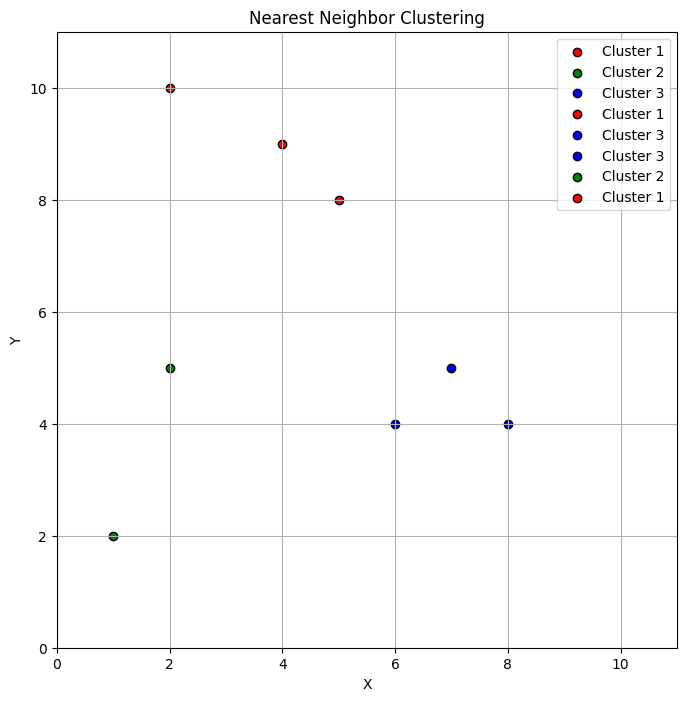

Q11: Performance comparison and disadvantages on bigger datasets
- K-Means is generally faster and more suitable for large datasets due to its lower computational complexity.
- NN clustering can be very slow for large datasets because it requires comparing each point to every other point or existing clusters.
Disadvantages of K-Means on large datasets:
- Can be sensitive to the initial placement of centroids.
- May converge to local minima, not necessarily the best solution.
Disadvantages of NN clustering on large datasets:
- Computationally expensive due to the pairwise distance calculations required.
- Can result in very uneven cluster sizes.


Q12
Accuracy: 56.17%


In [2]:
# Combined code for Q9-Q12, assuming initial setups and function definitions are already provided

points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Nearest Neighbor clustering algorithm
def nn_clustering(points, threshold):
    num_samples = points.shape[0]
    clusters = [-1] * num_samples  # Cluster assignments, -1 indicates unassigned
    cluster_count = 0  # Current cluster count

    for i in range(num_samples):
        if clusters[i] == -1:  # Unassigned data point
            clusters[i] = cluster_count  # Assign to a new cluster
            cluster_count += 1

        for j in range(num_samples):
            if i != j and clusters[j] == -1:  # Unassigned data point
                dist = np.linalg.norm(points[i] - points[j])  # Euclidean distance
                if dist <= threshold:
                    clusters[j] = clusters[i]  # Assign to the same cluster

    return clusters

# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(points, threshold)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.grid(True)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8']
for i, point in enumerate(points):
    cluster = clusters[i]
    plt.scatter(point[0], point[1], color=colors[cluster], edgecolor='black', label=labels[cluster])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nearest Neighbor Clustering')
plt.legend()


# Q9: Comparison with K-Means results
# Dataset 1: Data points
print ("\n\nQ9: Yes, it shows the same result")

# Q10: Final plot for NN clustering
print("\n\nQ10")
plt.show()

# Q11 Discuss performance comparison and disadvantages
print("Q11: Performance comparison and disadvantages on bigger datasets")
print("- K-Means is generally faster and more suitable for large datasets due to its lower computational complexity.")
print("- NN clustering can be very slow for large datasets because it requires comparing each point to every other point or existing clusters.")
print("Disadvantages of K-Means on large datasets:")
print("- Can be sensitive to the initial placement of centroids.")
print("- May converge to local minima, not necessarily the best solution.")
print("Disadvantages of NN clustering on large datasets:")
print("- Computationally expensive due to the pairwise distance calculations required.")
print("- Can result in very uneven cluster sizes.")


# Q12: NN Clustering on Dataset 2
# Assuming Dataset 2 has been loaded into `df`

# # Load Dataset 2
# url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
# data = pd.read_csv(url)

# Extract 'sbp', 'tobacco', and 'chd' columns
# df = data[['sbp', 'tobacco', 'chd']]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]

# Nearest Neighbor clustering algorithm
def nn_clustering(train_data, test_data, threshold):
    clusters = []
    for i in range(len(test_data)):
        min_dist = np.inf
        min_cluster = None
        for j in range(len(train_data)):
            dist = np.sqrt((test_data.iloc[i]['sbp'] - train_data.iloc[j]['sbp']) ** 2 +
                           (test_data.iloc[i]['tobacco'] - train_data.iloc[j]['tobacco']) ** 2)
            if dist < min_dist:
                min_dist = dist
                min_cluster = train_data.iloc[j]['chd']
        clusters.append(min_cluster)
    return clusters

# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(train_data, test_data, threshold)

# Calculate accuracy
accuracy = sum(clusters == test_data['chd']) / len(test_data) * 100

# Print accuracy
print("\n\nQ12")
print(f"Accuracy: {accuracy:.2f}%")


Q13


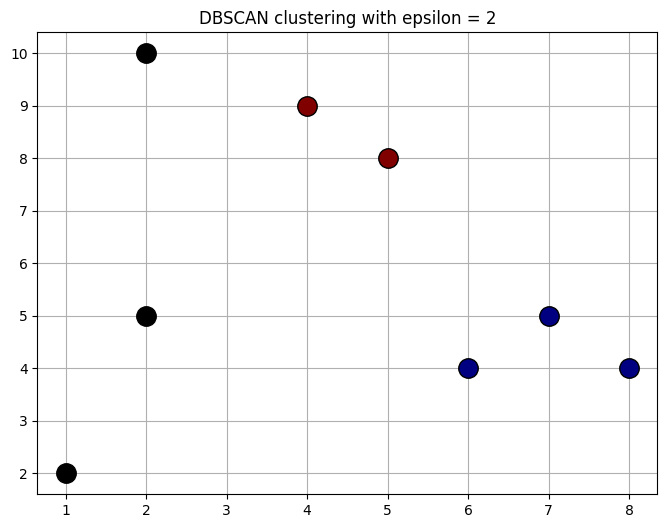



Q14


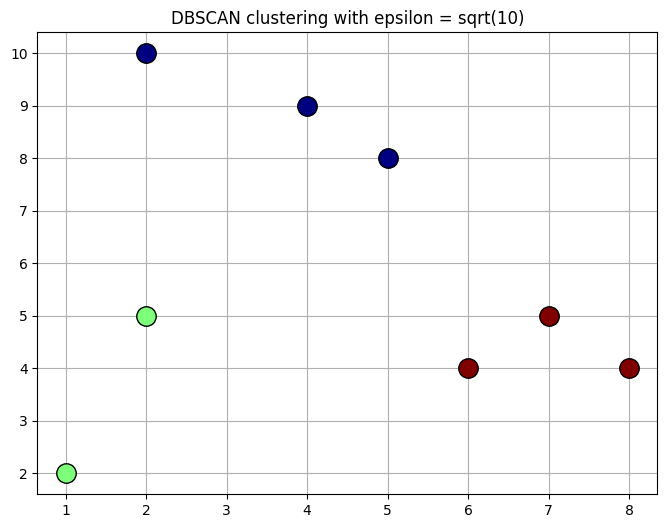



Q15
DBSCAN Test set pseudo-accuracy (excluding outliers): 0.75


DBScan is first, then K-N means and the NN


In [40]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Dataset 1
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Q13: DBSCAN with epsilon = 2 and minpoint = 2
print("Q13")
dbscan = DBSCAN(eps=2, min_samples=2).fit(points)
labels = dbscan.labels_

# Plotting
plt.figure(figsize=(8, 6))

unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        # Black used for noise.
        color = 'k'
    else:
        color = plt.cm.jet(float(label) / max(labels))
    class_member_mask = (labels == label)
    xy = points[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=14)
plt.title('DBSCAN clustering with epsilon = 2')
plt.grid(True)
plt.show()

# Q14: DBSCAN with epsilon = sqrt(10)
print("\n\nQ14")
dbscan_sqrt10 = DBSCAN(eps=np.sqrt(10), min_samples=2).fit(points)
labels_sqrt10 = dbscan_sqrt10.labels_

# Plotting
plt.figure(figsize=(8, 6))
unique_labels_sqrt10 = set(labels_sqrt10)
for label in unique_labels_sqrt10:
    if label == -1:
        # Black used for noise.
        color = 'k'
    else:
        color = plt.cm.jet(float(label) / max(labels_sqrt10))
    class_member_mask = (labels_sqrt10 == label)
    xy = points[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=14)
plt.title('DBSCAN clustering with epsilon = sqrt(10)')
plt.grid(True)
plt.show()

# Q15

print("\n\nQ15")

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load Dataset 2
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Preparing the data
train_df = df.iloc[:300, :]
test_df = df.iloc[300:, :]
X_train = train_df[['sbp', 'tobacco']].values
y_train = train_df['chd'].values
X_test = test_df[['sbp', 'tobacco']].values
y_test = test_df['chd'].values

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DBSCAN clustering
epsilon = 0.5  # Assumption, needs adjustment based on data exploration
min_samples = 2  # Starting point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X_train_scaled)
train_labels = dbscan.labels_

# Handling outliers and calculating pseudo-accuracy for training set
# Since DBSCAN might produce outliers, they're treated as a separate class (-1)
# For simplicity, this example won't involve complex handling of these outliers
clusters = np.unique(train_labels)
cluster_to_class_map = {}
for cluster in clusters:
    if cluster == -1:  # Skip outliers in this simple mapping
        continue
    index = (train_labels == cluster)
    majority_class = np.argmax(np.bincount(y_train[index]))
    cluster_to_class_map[cluster] = majority_class

# Predicting test set labels based on nearest cluster
test_labels = dbscan.fit_predict(X_test_scaled)
test_predicted_labels = np.array([cluster_to_class_map.get(label, -1) for label in test_labels])  # Default to -1 for unmapped/noise

# Calculating pseudo-accuracy for the test set (excluding outliers for simplicity)
valid_indices = test_predicted_labels != -1
# if np.sum(valid_indices) > 0:
    # print("Accuracy:", accuracy_score(y_train, y_test))
test_accuracy = np.mean(test_predicted_labels[valid_indices] == y_test[valid_indices])
print(f"DBSCAN Test set pseudo-accuracy (excluding outliers): {test_accuracy:.2f}")
print("\n\nDBScan is first, then K-N means and the NN")
# else:
#     print("No valid predictions made, possibly all are considered outliers.")

# Comparing performances might involve discussing the characteristics of each algorithm,
# like sensitivity to parameters (DBSCAN's eps and min_samples, K-means' initial centroids),
# the ability to detect outliers (DBSCAN), or computational efficiency.


#PART D

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(30, 6))

plt.subplot(1, 3, 1)
plt.scatter(points[:, 0], points[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.grid(True)
plt.legend()
plt.show()

X_train, y_train = points[:len(points) * 2 // 3], labels[:len(points) * 2 // 3]
X_test = points[len(points) * 2 // 3:]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicted_labels = knn.predict(X_test)

plt.figure(figsize=(30, 6))
plt.subplot(1, 3, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_labels, cmap='viridis', marker='x', label='Predicted Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nearest Neighbour Clustering')
plt.grid(True)
plt.legend()
plt.show()

dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan.fit(points)

dbscan_labels = dbscan.labels_

plt.figure(figsize=(30, 6))
plt.subplot(1, 3, 3)
plt.scatter(points[:, 0], points[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.grid(True)
# plt.colorbar(label='Cluster Label')

# plt.tight_layout()
plt.show()
